In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import itertools
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
fake=pd.read_csv('Fake.csv',encoding='latin-1')
true=pd.read_csv('True1 (1).csv',encoding='latin-1',error_bad_lines=False)  

In [26]:
# Concatenate the Unnamed 4 and 5 datas in text column
drop_cols = fake.columns[4:]
fake= fake.drop(columns=drop_cols) 
#Duplicated rows
fake[fake.duplicated(keep=False)]  
# Drop duplicated records
fake.drop_duplicates(inplace=True)  

In [45]:
# Convert date to datetime format

fake['date'] = pd.to_datetime(fake['date'], errors = 'coerce')
true['date'] = pd.to_datetime(true['date'], errors = 'coerce')
fake = fake.dropna()  

In [46]:
# Extract the year from the date column

fake['year'] = fake['date'].dt.year 
true['year'] = true['date'].dt.year

In [47]:
fake['year'] = fake['date'].dt.year.fillna(0).astype(int)
true['year'] = true['date'].dt.year.fillna(0).astype(int) 

In [49]:
fake.year.unique()  

array([2017, 2016, 2018, 2015])

In [50]:
true.year.unique()  

array([2017, 2016])

In [27]:
fake.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23479 entries, 0 to 23501
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23479 non-null  object
 1   text     23479 non-null  object
 2   subject  23468 non-null  object
 3   date     23468 non-null  object
dtypes: object(4)
memory usage: 917.1+ KB


In [28]:
true.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21211 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ï»¿title  21211 non-null  object
 1   text      21211 non-null  object
 2   subject   21211 non-null  object
 3   date      21211 non-null  object
dtypes: object(4)
memory usage: 828.6+ KB


so we can see that all the data in our dataset is catagorical
NOTE: You can see that all of the datetime related columns are not currently in datetime format. We will need to convert these later.

In [29]:
fake.shape 

(23479, 4)

In [30]:
true.shape 

(21211, 4)

In [31]:
def missing_data(df):
    """
    Objective
    ----------
    it shows the missing data in each column with 
    total missing values, percentage of missing value and
    its data type in descending order.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
    
    returns
    ----------
    missing_data: output data frame(pandas dataframe)
    
    """
    
    total = df.isna().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isna().count()  * 100).sort_values(ascending=False))
    data_type = df.dtypes
    missing_data = pd.concat([total,percent,data_type],axis=1,keys=['Total','Percent','Data_Type']).sort_values("Total", axis = 0, ascending = False)
    
    return missing_data 

In [32]:
missing_data(true) 

,Total,Percent,Data_Type
ï»¿title,0,0.0,object
text,0,0.0,object
subject,0,0.0,object
date,0,0.0,object


In [33]:
missing_data(fake) 

,Total,Percent,Data_Type
subject,11,0.0,object
date,11,0.0,object
title,0,0.0,object
text,0,0.0,object


we can clearly conclude that we don't have any missing data in our dataset .... GOOD to GO!!

Lets Check For Duplicates in our Dataset

In [34]:
def drop_duplicates(df):
    """
    Objective
    ----------
    Drop duplicates rows in data frame except for the first occurrence.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
        
    returns
    ----------
    dataframe with all unique rows
    """
        
    try:
        dr = df.duplicated().value_counts()
        print("[INFO] Dropping {} duplicates records...".format(dr))
        f_df = df.drop_duplicates(keep="first")
        
        return f_df
    except KeyError:
        print("[INFO] No duplicates records found")
        return df 

In [35]:
true=drop_duplicates(true) 

[INFO] Dropping False    21211
dtype: int64 duplicates records...


In [36]:
fake=drop_duplicates(fake) 

[INFO] Dropping False    23479
dtype: int64 duplicates records...


In [37]:
true.shape 

(21211, 4)

In [38]:
fake.shape 

(23479, 4)

#Previously we had :                                                   After Removing Duplicates we have :

fake dataset have 23481 ROWS and 4 COLUMNS                            fake dataset have 23478 ROWS and 4 COLUMNS

true dataset have 21416 ROWS and 4 COLUMNS                            true dataset have 21210 ROWS and 4 COLUMNS  

# Statistics View

Now let's look at some statistics about the datasets 

In [39]:
fake.describe() 

,title,text,subject,date
count,23479,23479,23468,23468
unique,17914,17466,17,1692
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [40]:
true.describe()

,ï»¿title,text,subject,date
count,21211,21211,21211,21211
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,"CHARLESTON, S.C. (Reuters) - Long viewed by th...",politicsNews,6-Dec-17
freq,14,2,11220,166


# Data visualization

<Axes: xlabel='subject', ylabel='count'>

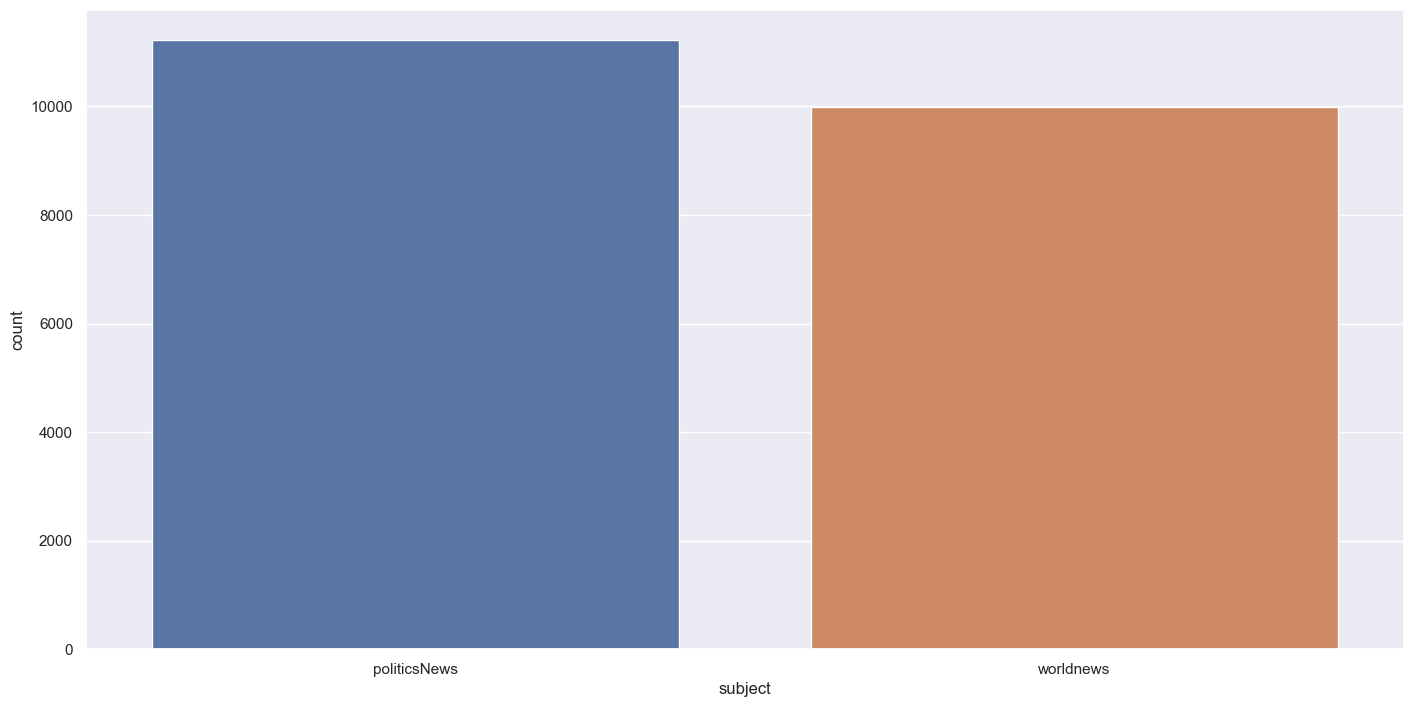

In [41]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(3.7,8.27)})
ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = true, x = 'subject', ax = ax1) 

After looking into the visualtion of different subject of fake news and comparing it with subjects of true news we can figure out the following things-

1)we have only 2 subjects in true ('politicsNews', 'worldnews') while fake have 6 subjects ('News', 'politics', 'Government News', 'left-news', 'US_News', 'Middle-east) .

since we are dealing with supervised machine learing model our ulimate goal should always be to make our model as simple as possible
with this goal we can apply some feature engineering into our fake dataset where we can merge 'News', 'left-news', 'US_News', 'Middle-east as 'worldnews' and merge 'politics', 'Government News'as 'politicsNews'

In [43]:
true.subject.unique() 

array(['politicsNews', 'worldnews'], dtype=object)

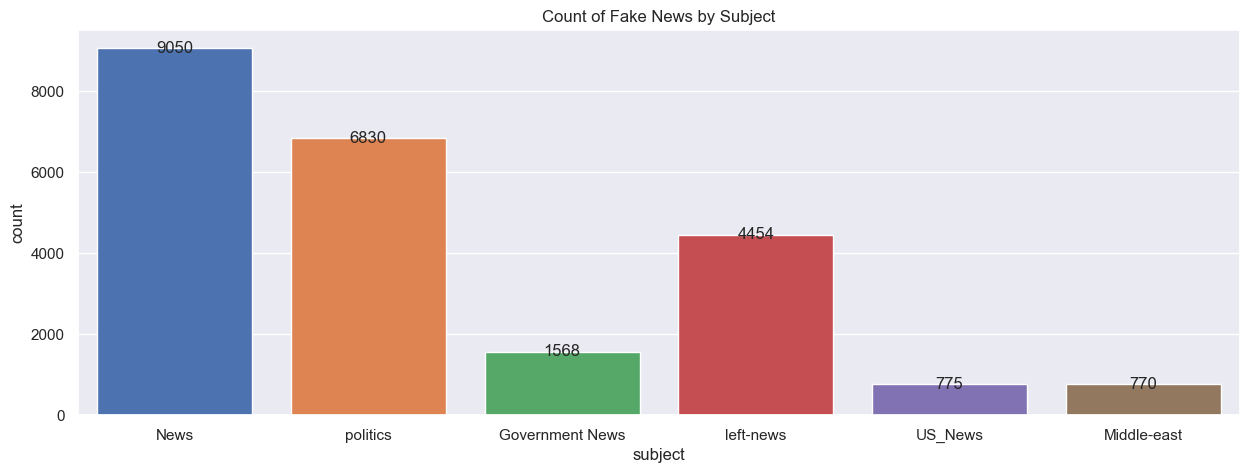

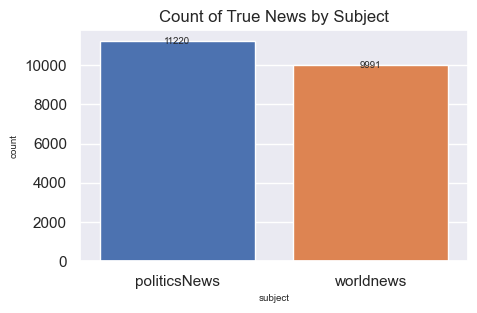

In [51]:
# Count of fake_news by subject
plt.figure(figsize=(15, 5))
ax1 =sns.countplot(x='subject', data=fake, saturation = 1.5)
plt.title('Count of Fake News by Subject')

for p in ax1.patches:
    ax1.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')
plt.show()

# Count of true_news by subject
plt.figure(figsize=(5, 3))
plt.rcParams['font.size'] = 7
ax2 = sns.countplot(x='subject', data=true, saturation = 1.5)
plt.title('Count of True News by Subject')
for p in ax2.patches:
    ax2.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')
plt.show() 

In [52]:
fake.subject.unique() 

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [53]:
fake['subject'] = fake['subject'].replace(['News'], 'worldnews')
fake['subject'] = fake['subject'].replace(['left-news'], 'worldnews')
fake['subject'] = fake['subject'].replace(['US_News'], 'worldnews')
fake['subject'] = fake['subject'].replace(['Middle-east'], 'worldnews')
fake['subject'] = fake['subject'].replace(['politics'], 'politicsNews')
fake['subject'] = fake['subject'].replace(['Government News'], 'politicsNews') 

In [54]:
fake.subject.unique() 

array(['worldnews', 'politicsNews'], dtype=object)

[Text(0.5, 0, 'True_Subject'), Text(0, 0.5, 'count')]

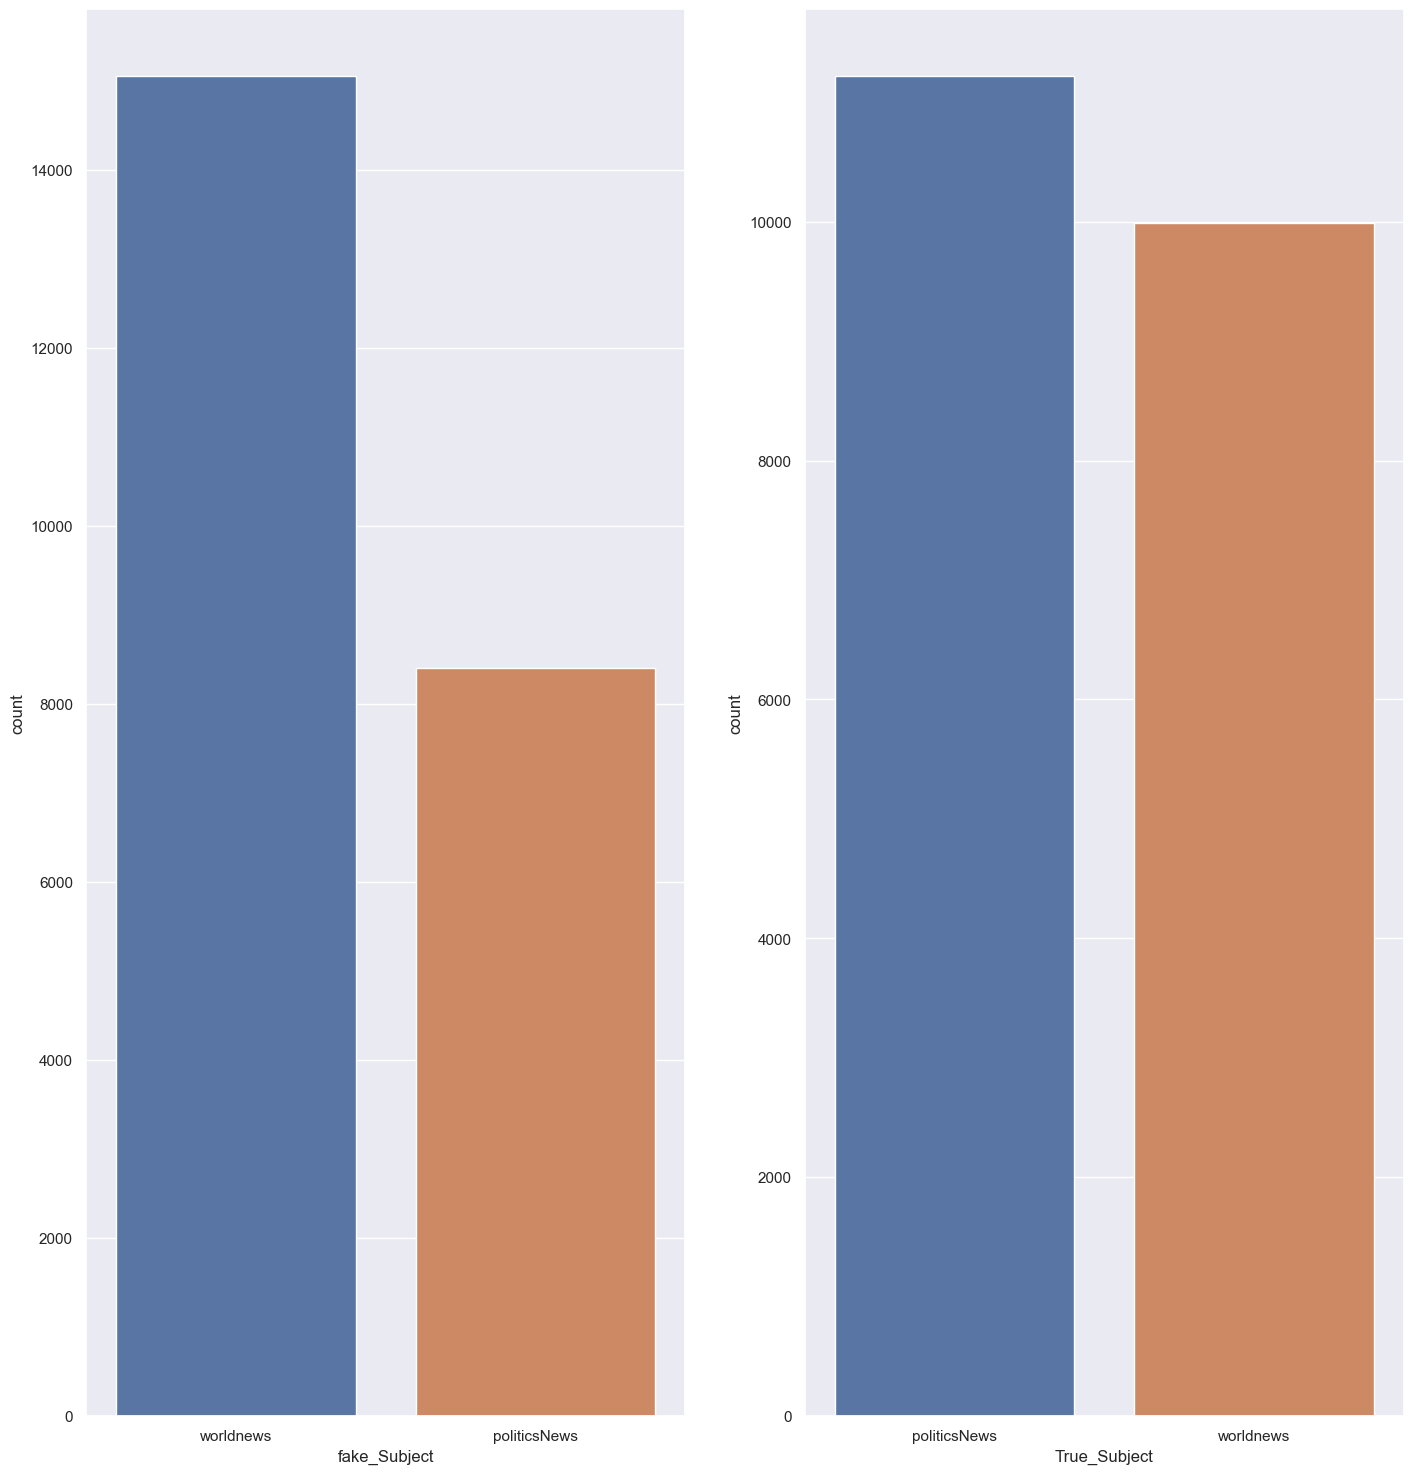

In [55]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(11,8)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
sns.countplot(data = fake, x = 'subject', ax = ax1,).set(xlabel='fake_Subject', ylabel='count')
sns.countplot(data = true, x = 'subject', ax = ax2).set(xlabel='True_Subject', ylabel='count') 

Converting the date feature into months and years 

In [58]:
from datetime import datetime
import calendar
true['date'] = pd.to_datetime(true['date'], errors='coerce')
num = true['date'].dt.month  

In [59]:
fake['date'] = pd.to_datetime(fake['date'], errors='coerce')
num = fake['date'].dt.month 

In [60]:
true.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21211 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ï»¿title  21211 non-null  object        
 1   text      21211 non-null  object        
 2   subject   21211 non-null  object        
 3   date      21211 non-null  datetime64[ns]
 4   year      21211 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 911.4+ KB


In [61]:
fake.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23447 entries, 0 to 23501
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    23447 non-null  object        
 1   text     23447 non-null  object        
 2   subject  23447 non-null  object        
 3   date     23447 non-null  datetime64[ns]
 4   year     23447 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 1007.5+ KB


In [62]:
fake['Month'] = fake.date.apply(lambda x:x.month)
fake['Year'] = fake.date.apply(lambda x:x.year) 

In [63]:
true['Month'] = true.date.apply(lambda x:x.month)
true['Year'] = true.date.apply(lambda x:x.year) 

In [64]:
fake.head()

,title,text,subject,date,year,Month,Year
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,worldnews,2017-12-31,2017,12,2017
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,worldnews,2017-12-31,2017,12,2017
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",worldnews,2017-12-30,2017,12,2017
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",worldnews,2017-12-29,2017,12,2017
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,worldnews,2017-12-25,2017,12,2017


In [65]:
del fake['date']
del true['date'] 

In [66]:
true.head() 

,ï»¿title,text,subject,year,Month,Year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017,12,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017,12,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017,12,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017,12,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017,12,2017


In [67]:
fake.head() 

,title,text,subject,year,Month,Year
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,worldnews,2017,12,2017
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,worldnews,2017,12,2017
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",worldnews,2017,12,2017
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",worldnews,2017,12,2017
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,worldnews,2017,12,2017


[Text(0.5, 0, 'True_Subject'), Text(0, 0.5, 'count')]

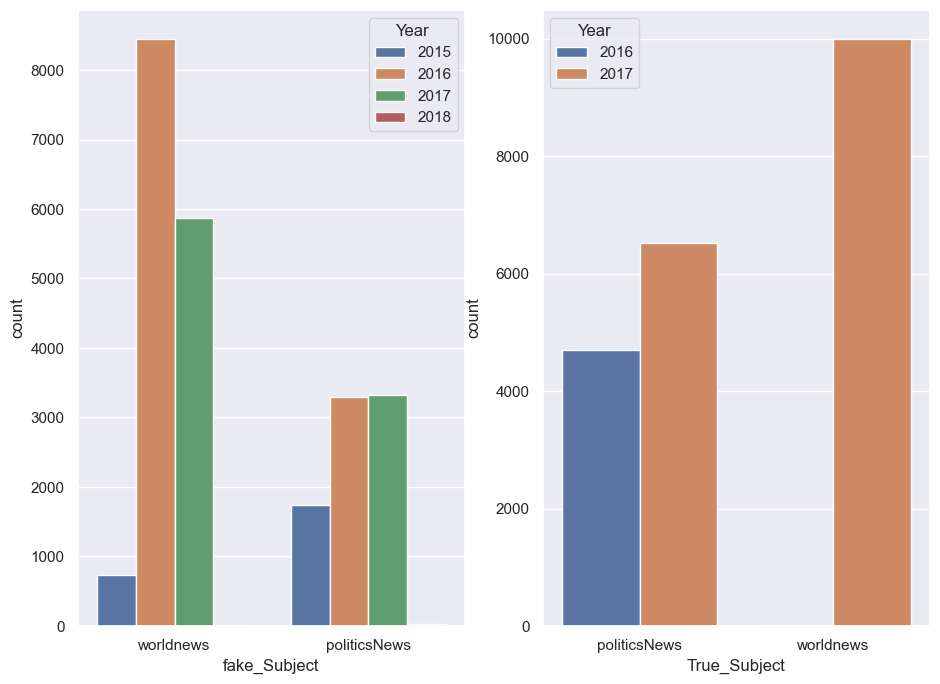

In [68]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(11,8)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
sns.countplot(data = fake, x = 'subject', hue='Year',ax = ax1,).set(xlabel='fake_Subject', ylabel='count')
sns.countplot(data = true, x = 'subject',hue='Year', ax = ax2).set(xlabel='True_Subject', ylabel='count') 

We can see that most of the true news revolvs around 2017 and 2016 and more of that in 2017 we have most of the true world news

# Data Cleaning
Now we are moving ahead with cleaning our data

Removal of HTML Contents

Removal of Punctuation Marks and Special Characters

Removal of Stopwords

Lemmatization 

First of all we are mearging our tile,subject with text in to a single column 'text' to continue with our data cleaning process 

In [69]:
from bs4 import BeautifulSoup
import re
import nltk
import string
from nltk.corpus import stopwords  

In [70]:
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text) 

In [71]:
def cleaning(text):
    text = remove_html(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: cleaning(x) 

In [72]:
true.head() 

,ï»¿title,text,subject,year,Month,Year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017,12,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017,12,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017,12,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017,12,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017,12,2017


In [73]:
fake.head()

,title,text,subject,year,Month,Year
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,worldnews,2017,12,2017
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,worldnews,2017,12,2017
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",worldnews,2017,12,2017
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",worldnews,2017,12,2017
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,worldnews,2017,12,2017


In [74]:
fake['text']=fake['text'].apply(cleaning)

In [75]:
fake.head() 

,title,text,subject,year,Month,Year
0,Donald Trump Sends Out Embarrassing New Year...,donald trump just couldn t wish all americans ...,worldnews,2017,12,2017
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,worldnews,2017,12,2017
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,worldnews,2017,12,2017
3,Trump Is So Obsessed He Even Has Obamas Name...,on christmas day donald trump announced that h...,worldnews,2017,12,2017
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,worldnews,2017,12,2017


In [76]:
#num of Words 
fake['num_words']=fake['text'].apply(lambda x:len(nltk.word_tokenize(x)))
fake.head()
 

,title,text,subject,year,Month,Year,num_words
0,Donald Trump Sends Out Embarrassing New Year...,donald trump just couldn t wish all americans ...,worldnews,2017,12,2017,454
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,worldnews,2017,12,2017,304
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,worldnews,2017,12,2017,542
3,Trump Is So Obsessed He Even Has Obamas Name...,on christmas day donald trump announced that h...,worldnews,2017,12,2017,412
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,worldnews,2017,12,2017,420


In [77]:
#num of sentence 
fake['num_sent']=fake['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
del fake['num_sent'] 

In [78]:
#Word frequency for fake dataset
freq = pd.Series(' '.join(fake['text']).split()).value_counts()[:20] # for top 50
freq

the      517530
to       285764
of       231017
and      220519
a        207270
in       161605
that     148348
s        127565
is       109401
for       90608
on        80191
it        77490
he        76981
trump     73023
was       66854
with      62059
his       57517
as        54542
this      53488
be        48026
dtype: int64

In [79]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
fake['text'] = fake['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [80]:
#word frequency after removal of stopwords in fake dataset
freq_fk = pd.Series(' '.join(fake['text']).split()).value_counts()[:20] # for top 50
freq_fk 

trump        73023
said         30872
people       25770
president    25303
would        23199
one          22503
us           21558
clinton      17679
obama        17666
like         17419
donald       17026
also         14896
new          13870
news         13816
even         13511
hillary      13354
white        12652
time         12573
state        12184
via          11134
dtype: int64

In [81]:
#Lets perfom lamatization into entire dataset
def lemmatize_words(text):
        lemma = nltk.WordNetLemmatizer()
        words = text.split()
        words = [lemma.lemmatize(word,pos='v') for word in words]
        return ' '.join(words) 

In [82]:
fake['text'] = fake['text'].apply(lemmatize_words) 

In [83]:
#word frequency after lamatization in fake dataset
freq_fk = pd.Series(' '.join(fake['text']).split()).value_counts()[:100] # for top 100
freq_fk 

trump        73363
say          51332
people       25861
president    25303
go           23742
             ...  
really        6125
another       6049
americans     6049
day           6010
every         5964
Length: 100, dtype: int64

# Now as per our analysis lets add the top 100 most frequently occuring common words into stop words

# FAKE NEWS 

In [86]:
new_stopwords = ['trump','say','president','people','go','make','state','would','one','us','get','obama','clinton','time'] 

In [87]:
stop.extend(new_stopwords) 

In [88]:
stop 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [89]:
fake['text'] = fake['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 

In [90]:
stop = nltk.corpus.stopwords.words('english')
stop.extend(new_stopwords) 

In [91]:
fake['text'] 

0        donald wish americans happy new year leave ins...
1        house intelligence committee chairman devin nu...
2        friday reveal former milwaukee sheriff david c...
3        christmas day donald announce back work follow...
4        pope francis use annual christmas day message ...
                               ...                        
23497    century wire report earlier week unlikely mish...
23498    century wire familiar theme whenever dispute c...
23499    patrick henningsen century wireremember admini...
23500    century wire al jazeera america history bigges...
23501    century wire predict new year look ahead new h...
Name: text, Length: 23447, dtype: object

# TRUE DATASET
 

In [92]:
true['text']=true['text'].apply(cleaning) 

In [93]:
#Word frequency for true dataset
freq = pd.Series(' '.join(true['text']).split()).value_counts()[:20] # for top 50
freq

the      476192
to       242177
of       202525
a        195425
and      179473
in       178443
on       106976
said      97782
that      86037
for       78806
is        54799
with      53871
he        52656
was       47321
by        47085
as        46710
it        46039
has       45657
s         44026
trump     42081
dtype: int64

In [94]:
#removing stopwords
stop = stopwords.words('english')
true['text'] = true['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [95]:
#num of Words 
true['num_words']=true['text'].apply(lambda x:len(nltk.word_tokenize(x)))
true.head()
 

,ï»¿title,text,subject,year,Month,Year,num_words
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters head conservative republica...,politicsNews,2017,12,2017,442
1,U.S. military to accept transgender recruits o...,washington reuters transgender people allowed ...,politicsNews,2017,12,2017,376
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters special counsel investigati...,politicsNews,2017,12,2017,262
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,2017,12,2017,227
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tru...,politicsNews,2017,12,2017,486


In [97]:
#word frequency after removal of stopwords in fake dataset
freq_tr = pd.Series(' '.join(true['text']).split()).value_counts()[:20] # for top 20
freq_tr 

said          97782
trump         42081
us            40647
would         31160
reuters       28003
president     25246
state         18536
government    17706
new           16626
house         16253
states        16145
also          15749
united        15347
republican    15205
people        14910
told          14071
could         13528
one           12505
last          12472
washington    12051
dtype: int64

In [98]:
#Lets Perform Lamatization
true['text'] = true['text'].apply(lemmatize_words) 

In [99]:
#word frequency after lamatization in true dataset
freq_tr = pd.Series(' '.join(true['text']).split()).value_counts()[:100] # for top 100
freq_tr 

say        113447
trump       42185
us          40647
state       34926
would       31160
            ...  
help         6433
federal      6385
talk         6342
million      6325
lead         6311
Length: 100, dtype: int64

In [100]:
true['text'] 

0        washington reuters head conservative republica...
1        washington reuters transgender people allow fi...
2        washington reuters special counsel investigati...
3        washington reuters trump campaign adviser geor...
4        seattlewashington reuters president donald tru...
                               ...                        
21412    brussels reuters nato ally tuesday welcome pre...
21413    london reuters lexisnexis provider legal regul...
21414    minsk reuters shadow disused sovietera factori...
21415    moscow reuters vatican secretary state cardina...
21416    jakarta reuters indonesia buy sukhoi fighter j...
Name: text, Length: 21211, dtype: object

<Axes: xlabel='num_words', ylabel='Count'>

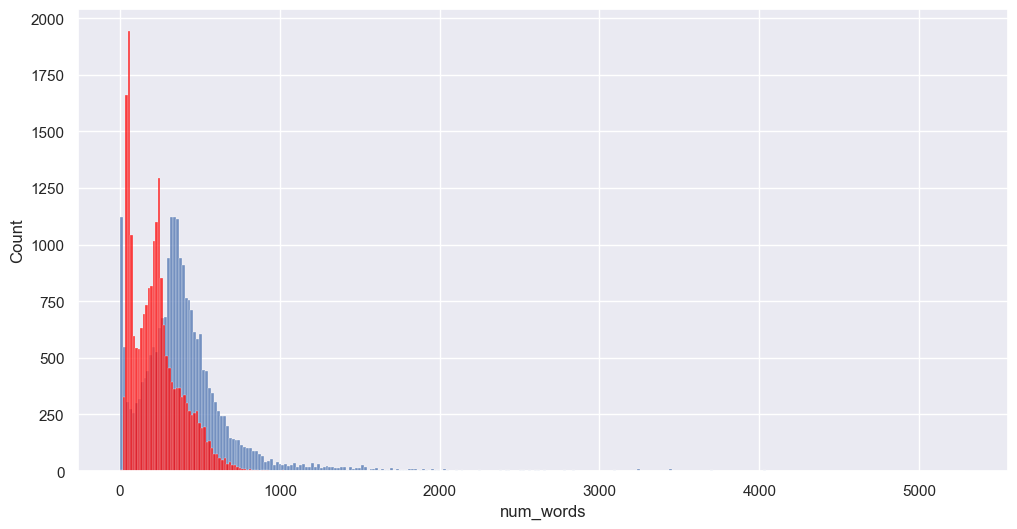

In [101]:
plt.figure(figsize=(12,6))
sns.histplot(fake['num_words'])
sns.histplot(true['num_words'],color='red')

# We can see that in true news we have more words in comparision to fake news

Creating a dataframe 'data'
Adding an Target vaeriable into our data frame assigning 1 to true and 0 to fake

In [102]:
#add column 
true['target'] = 1
fake['target'] = 0  

In [103]:
data=pd.concat([true,fake],ignore_index=True,sort=False) 

In [104]:
from sklearn.utils import shuffle
data=shuffle(data)
data=data.reset_index(drop=True) 

In [105]:
data.head() 

,ï»¿title,text,subject,year,Month,Year,num_words,target,title
0,NaN,wow thrill leg chris matthews stun support hil...,politicsNews,2016,11,2016,304,0,WHOA! 3 WELL-KNOWN Democrats Go NUCLEAR On Hil...
1,NaN,donald may spend furiously tweet russia invest...,worldnews,2017,5,2017,389,0,Chris Wallace Just Shoved His Foot So Far Up ...
2,Support for anti-immigration Sweden Democrats ...,stockholm reuters support farright antiimmigra...,worldnews,2017,12,2017,167,1,NaN
3,NaN,campaign event riviera beach florida bill spea...,worldnews,2016,2,2016,377,0,Bill Clinton Hilariously Smacks Down Obnoxiou...
4,Democrats raise doubts about Trump's high cour...,washington reuters neil gorsuch president dona...,politicsNews,2017,3,2017,557,1,NaN


# Data visualization 

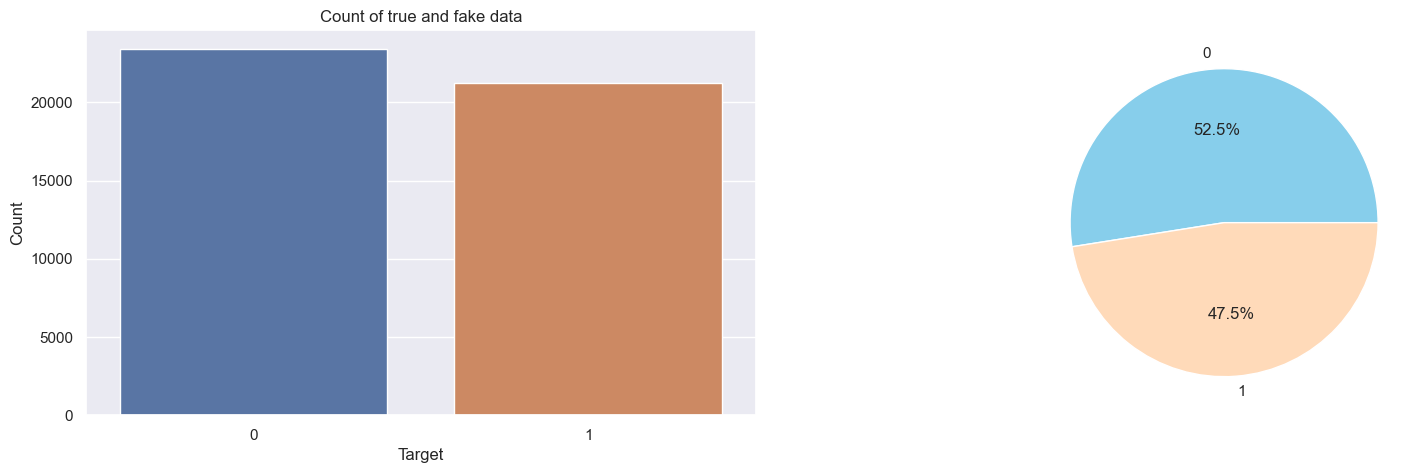

In [106]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(data =data,x ='target',ax = ax[0]);
g1.set_title("Count of true and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("Target")
g2 = plt.pie(data["target"].value_counts().values,explode=[0,0],labels=data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
plt.show()

<Axes: >

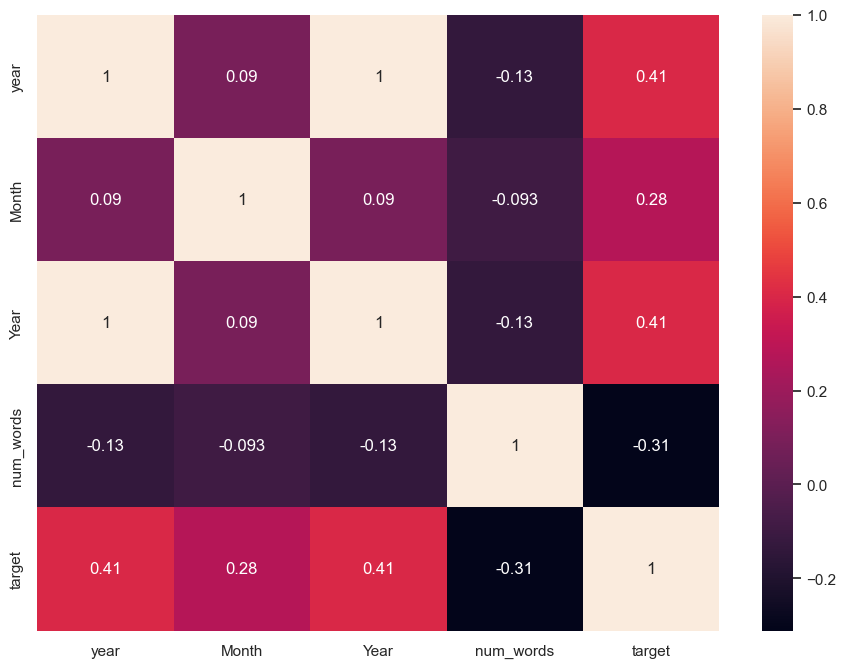

In [107]:
sns.heatmap(data.corr(),annot=True) 

# But before moving towards model building techniques lets see if out target variable is effected by the sentiments of the text or not , this might be an important factor lets see 

In [108]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia= SentimentIntensityAnalyzer() 

In [109]:
check=data.text[0] 

In [110]:
sia.polarity_scores(check) 

{'neg': 0.123, 'neu': 0.543, 'pos': 0.334, 'compound': 0.9826}

# Although the text is fake but we are getting possitive polarity for sentimental analysis soo we can say its of no use
Model Building
Using TFIDF MAX FEATURES = 1000# 

In [111]:
data.head() 

,ï»¿title,text,subject,year,Month,Year,num_words,target,title
0,NaN,wow thrill leg chris matthews stun support hil...,politicsNews,2016,11,2016,304,0,WHOA! 3 WELL-KNOWN Democrats Go NUCLEAR On Hil...
1,NaN,donald may spend furiously tweet russia invest...,worldnews,2017,5,2017,389,0,Chris Wallace Just Shoved His Foot So Far Up ...
2,Support for anti-immigration Sweden Democrats ...,stockholm reuters support farright antiimmigra...,worldnews,2017,12,2017,167,1,NaN
3,NaN,campaign event riviera beach florida bill spea...,worldnews,2016,2,2016,377,0,Bill Clinton Hilariously Smacks Down Obnoxiou...
4,Democrats raise doubts about Trump's high cour...,washington reuters neil gorsuch president dona...,politicsNews,2017,3,2017,557,1,NaN


In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
x= pd.DataFrame(denselist, columns = names_features) 

In [113]:
y=data['target'] 

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2) 

In [115]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score 

In [116]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB() 

In [117]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)) 

0.9762651141961487
[[4457  209]
 [   3 4263]]
0.9532647584973166


In [118]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)) 

0.9766009852216748
[[4474  192]
 [  17 4249]]
0.9567664940328755


In [119]:
bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)) 

0.9894760412001792
[[4584   82]
 [  12 4254]]
0.9810885608856088


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

In [121]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2) 

In [122]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'GBDT':gbdt,
    
} 

In [123]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision 

In [124]:
train_classifier(svc,x_train,y_train,x_test,y_test) 

(0.9985445588893864, 0.9997649823736781)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision) 

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values( 

In [ ]:
performance_df 